In [6]:
%matplotlib inline
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import RandomUnderSampler




def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct='%1.1f%%')
    ax.axis('equal')
    plt.show

Information of the original iris data set: 
 Counter({0: 50, 1: 50, 2: 50})
Information of the iris data set after making it imbalanced using a dict: 
 ratio={0: 10, 1: 20, 2: 30} 
 y: Counter({2: 30, 1: 20, 0: 10})


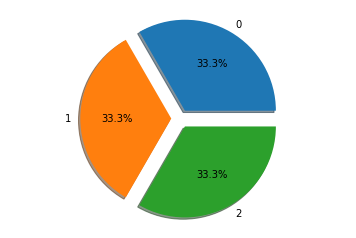

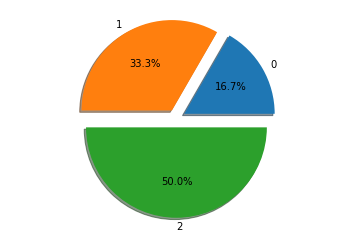

In [8]:
iris = load_iris()

print('Information of the original iris data set: \n {}'.format(
    Counter(iris.target)))
plot_pie(iris.target)

ratio = {0: 10, 1: 20, 2: 30}
X, y = make_imbalance(iris.data, iris.target, ratio=ratio)

print('Information of the iris data set after making it'
      ' imbalanced using a dict: \n ratio={} \n y: {}'.format(ratio,
                                                              Counter(y)))
plot_pie(y)

Information of the iris data set after making it imbalanced using a callable: 
 ratio=<function ratio_multiplier at 0x000000001AA2C8C8> 
 y: Counter({2: 47, 1: 35, 0: 25})


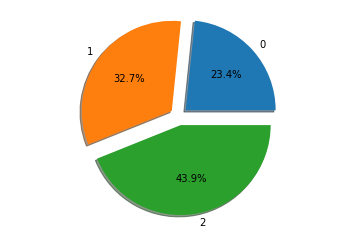

In [7]:
def ratio_multiplier(y):
    multiplier = {0: 0.5, 1: 0.7, 2: 0.95}
    target_stats = Counter(y)
    for key, value in target_stats.items():
        target_stats[key] = int(value * multiplier[key])
    return target_stats


X, y = make_imbalance(iris.data, iris.target, ratio=ratio_multiplier)

print('Information of the iris data set after making it'
      ' imbalanced using a callable: \n ratio={} \n y: {}'.format(
          ratio_multiplier, Counter(y)))
plot_pie(y)